In this notebook we will analyze the dataset and hopefully answer some interesting questions

In [1]:
# importing libs
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('../data_for_notebooks/recomm_df_w_dummies.csv')

In [4]:
df.shape

(625, 325)

In [5]:
df.head(1)

,id,job_title,company_name,details,category,compensation,start,end,href,skills_.net,...,job_loc_trichy,job_loc_uluberia,job_loc_uttar dinajpur,job_loc_uttarkashi,job_loc_varanasi,job_loc_vijayapur,job_loc_vijayawada,job_loc_visakhapatnam,job_loc_west midnapore,job_loc_zirakpur
0,1,hr executive - recruitment,engenia technologies,we are seeking a hr recruiter who will...,human resources recruiter,paid,2019-03-02,2019-08-28,http://letsintern.com/internship/Human-Resourc...,0,...,0,0,0,0,0,0,0,0,0,0


Some questions that I want to answer with the data:

1. What are the most common types of category of internships ?
2. For each category of internship, find the area/state/city where the max no. of internships are offered.
3. What are the most in demand skills ? 
4. Which skills are most required for each category ?
5. Find which category has the maximum no. of unpaid internships ?

### 1. What are the most common types of category of internships ?

The categories we are dividing the data into are : 

hr, management, it, finance, marketing_sales, engineering, customer_service, design, social_work, teaching, air_related, research and business_related 

In [6]:
def get_cat_items(cat, df = df):
    '''
    returns a dataframe that has the internships related to that category
    '''
    # making some common job categories
    # these are extremely broad categories. I am pretty sure that I am missing some categories
    # these categories have been derived/picked up from letsintern's landing page as we had picked up the 
    # data from there

    # defining some rules to put items into categories
    if cat == 'management':
        return df[df.category.str.contains('manag')]
    if cat == 'hr':
        return df[df.category.str.contains('human|scout')]
    if cat == 'it':
        return df[df.category.str.contains('it |computer|information tech|developer|software')]
    if cat == 'finance':
        return df[df.category.str.contains('account|bank|financ')]
    if cat == 'marketing_sales':
        return df[df.category.str.contains('market|social media|sale|brand|seo|google analytic|content')]
    if cat == 'engineering':
        return df[df.category.str.contains('engineer')]
    if cat == 'customer_service':
        return df[df.category.str.contains('customer')]
    if cat == 'design':
        return df[df.category.str.contains('design| art |graphic')]
    if cat == 'social_work':
        return df[df.category.str.contains('social work|ngo|n.g.o')]
    if cat == 'teaching':
        return df[df.category.str.contains('teach|educatio')]
    if cat == 'air_related':
        return df[df.category.str.contains('air|plane|pilot|hostess')]
    if cat == 'research':
        return df[df.category.str.contains('research')]
    if cat == 'business_related':
        return df[df.category.str.contains('business')]


In [7]:
# plotting the different categories
cats = 'hr,management,it,finance,marketing_sales,engineering,customer_service,design,social_work,teaching,\
air_related,research,business_related'.split(',')

In [8]:
len_cats = [get_cat_items(i).shape[0] for i in cats]
percent_cats = [i/sum(len_cats) for i in len_cats]

Text(0.5,1,'Proportion of Internships for each category')

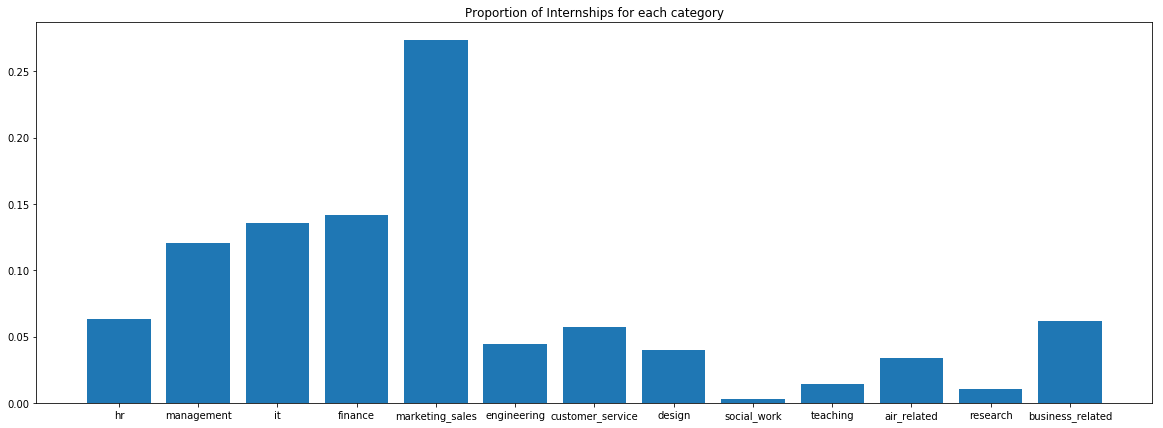

In [9]:
plt.figure(figsize = (20,7))
plt.bar(x = cats, height = percent_cats)
plt.title('Proportion of Internships for each category')

Markteting and sales managed to top the list which was a little obvious since there were both sales and marketing internships mixed in this category. But even then, the proportion is almost the double of that of finance. Finance came in 2nd which I orginally thought would be occupied by IT as thats a huge sector with a lot of internship openings usually. IT came in 3rd followed by management.

Its sad to see that the number of internships for social work was really low, the lowest among all categories. It is possible that some may have been missed out due to lack of keywords used to identify social work internships, but even given that, the number is pretty small.

### 2. For each category of internship, find the area/state/city where the max no. of that category's internships are offered for.

In [10]:
loc_dict = dict()
# the top 2 places where interships for each category are max have been listed below
for i in cats:
    # df for a particular category is returned
    df_temp = get_cat_items(i)
    # top 2 places are selected by taking the sum of values under the 'job location' columns
    top_2 = df_temp[df_temp.columns[df_temp.columns.str.contains('job_loc')]].sum(axis = 0).sort_values(ascending = False).head(2).index.tolist()
    # 'job_loc' is removed from all entries for clean results
    top_2 = [i[8:] for i in top_2]
    print(i)
    print(top_2)
    print('------')
    # for plotting
    for i in top_2:
        if i not in loc_dict:
            loc_dict[i] = 1
        else:
            loc_dict[i] += 1

hr
['anywhere in india', 'kolkata']
------
management
['mumbai', 'bangalore']
------
it
['bangalore', 'anywhere in india']
------
finance
['kolkata', 'howrah']
------
marketing_sales
['mumbai', 'bangalore']
------
engineering
['delhi', 'chennai']
------
customer_service
['kolkata', 'delhi']
------
design
['bangalore', 'anywhere in india']
------
social_work
['mumbai', 'hyderabad']
------
teaching
['anywhere in india', 'delhi']
------
air_related
['kolkata', 'bhubaneswar']
------
research
['mumbai', 'chennai']
------
business_related
['mumbai', 'bangalore']
------


<BarContainer object of 9 artists>

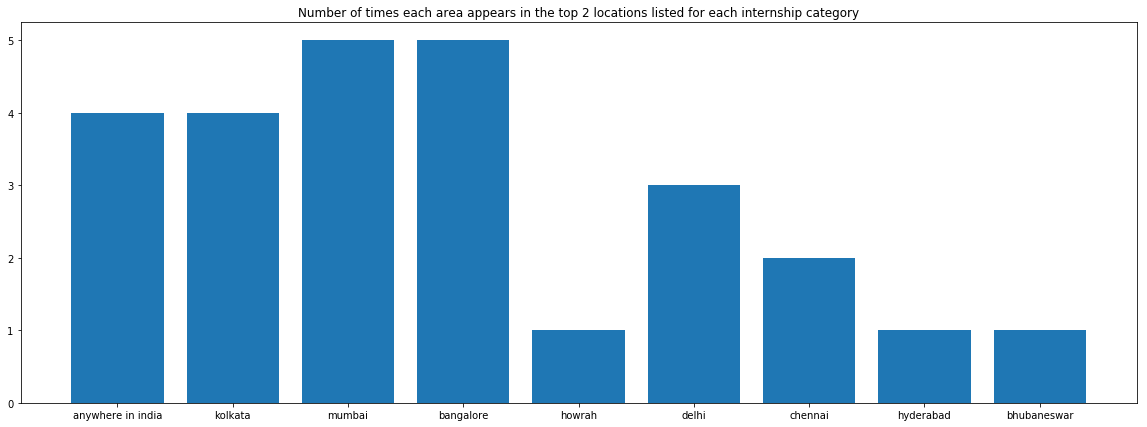

In [11]:
plt.figure(figsize = (20,7))
plt.title('Number of times each area appears in the top 2 locations listed for each internship category')
plt.bar(x = list(loc_dict.keys()), height = list(loc_dict.values()))

This above graph tells us the number of times each of the above area was found in the top 2 locations for an  internship category. So we took, for each category, the 2 places that appeared the maximum number of times for all the internships in a category. Then we graphed how many times a particular place appeared in the top 2 places for every internship category. 

This graph helps us tell the most preferred locations for internships.

Text(0.5,1,'Proportions of Top 5 Locations Listed')

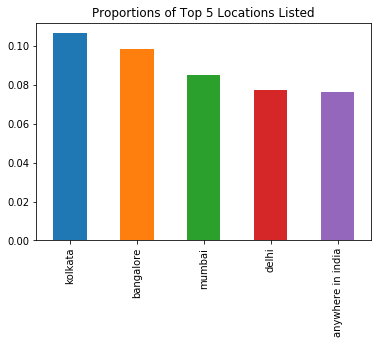

In [12]:
# maximum internships openings are in ? 
max_internships_area = df[df.columns[df.columns.str.contains('job_loc')]].sum(axis = 0).sort_values(ascending = False).head(5)
max_internships_area.index = max_internships_area.index.str[8:]
max_internships_area_perc = max_internships_area/df.iloc[:, df.columns.str.contains('job_loc')].sum().sum()
max_internships_area_perc.plot(kind= 'bar')
plt.title('Proportions of Top 5 Locations Listed')

Note that above, the proportions of the columns wont sum up to 1 and thats because we have only taken the top 5 columns but have divided their values by the sum of all the 'job location' related columns. That means these are the proportions they have w.r.t. the entire data and all the possible locations.

By checking out the above 2 graphs we find something interesting. The 1st graph tells us that Mumbai and Bangalore both came 5 times each in the top 2 list of the places where most internships were offered for each category. But when we see the 2nd graph, it shows that Kolkata has the maximum no. of internships. So there must be some categories in which Kolkata must have had a higher number of internships compared to Mumbai and Bangalore without making it to the top 2 for that category.

Thus, if a person is looking for internships in general and is open to all kind, then Kolkata would be the best place of getting an internship but if they are interested in a particular area, then that category's top 2 places should be looked at. If we don't have the data on the top 2 from each category but we do have the first graph, then we can conclude that going for Mumbai or Bangalore would be in their best interest.

So it basically means that most industries really specialize in Mumbai and Bangalore while more generally Kolkata has more internship opportunities.

### 3. What are the most in demand skills ? 

Text(0.5,1,'Skills Most in Demand')

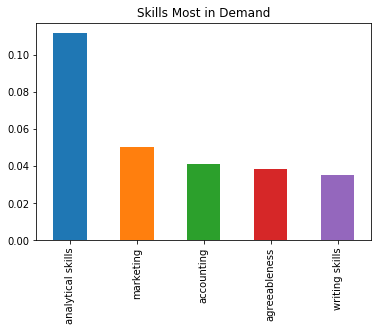

In [13]:
most_demand_skills = df.iloc[:,df.columns.str.contains('skills')].sum(axis = 0).sort_values(ascending = False).head(5)
most_demand_skills.index = most_demand_skills.index.str[7:]
most_demand_skills_perc = most_demand_skills/df.iloc[:,df.columns.str.contains('skills')].sum().sum()
most_demand_skills_perc.plot(kind= 'bar')
plt.title('Skills Most in Demand')

Again, here too the columns wouldn't sum upto 1 because the values have been divided by the total number of skills listed to create proportions.

### 4. Which skills are most required for each category ?

In [14]:
skill_dict = dict()
for i in cats:
    # df for a particular category is returned
    df_temp = get_cat_items(i)
    # top 3 places are selected by taking the sum of values under the 'skills' columns
    top_3 = df_temp.iloc[:,df_temp.columns.str.contains('skills')].sum(axis = 0).sort_values(ascending = False).head(3).index.tolist()
    # 'skills_' is removed from all entries for clean results
    top_3 = [i[7:] for i in top_3]
    print(i)
    print(top_3)
    print('------')
    # for plotting
    for i in top_3:
        if i not in skill_dict:
            skill_dict[i] = 1
        else:
            skill_dict[i] += 1

hr
['analytical skills', 'no skills preferred', 'human resource practices']
------
management
['writing skills', 'analytical skills', 'marketing']
------
it
['php', 'javascript', 'html']
------
finance
['accounting', 'analytical skills', 'computer literacy']
------
marketing_sales
['marketing', 'analytical skills', 'digital marketing']
------
engineering
['mechanical engineering', 'electrical engineering', 'production and industrial engineering']
------
customer_service
['customer service situation handling', 'agreeableness', 'customer expectation management']
------
design
['photoshop', 'illustrator', 'design patterns']
------
social_work
['agreeableness', 'leadership skills', 'written english']
------
teaching
['analytical skills', 'spoken english comprehension', 'accounting']
------
air_related
['english comprehension', 'analytical skills', 'customer expectation management']
------
research
['analytical skills', 'internet ability', 'ms office']
------
business_related
['analytical s

<BarContainer object of 27 artists>

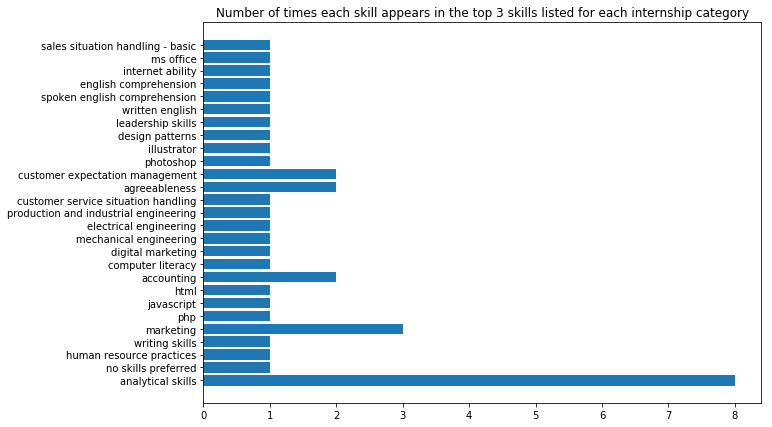

In [15]:
plt.figure(figsize = (10,7))
plt.title('Number of times each skill appears in the top 3 skills listed for each internship category')
plt.barh(y = list(skill_dict.keys()), width = list(skill_dict.values()))

Now its easy to see why analytical skills were the most in demand in the 3rd question. In almost all the categories, analytical skills are in the top 3 most demanded skills. Its probably because employers prefer candidates to have good analytical ability to solve problems and also because most jobs nowadays require the knowledge of using computer softwares to analyze stuff. Also categories like teaching are entirely dependent on the field the teacher is needed for. Thus analytical skills may not be directly required by teaching as such but maybe required by the field being taught about.

Some categories like design, IT and engineering have totally field specific skills in top demanded skills. Maybe if we had a bigger dataset, we could have inferred more from this.

### 5. Find which category has the maximum no. of unpaid internships ?

hr
4
------
management
8
------
it
29
------
finance
9
------
marketing_sales
19
------
engineering
4
------
customer_service
5
------
design
5
------
social_work
1
------
teaching
1
------
air_related
3
------
research
0
------
business_related
1
------


Text(0.5,1,'Proportion of Unpaid Internships for Each Category')

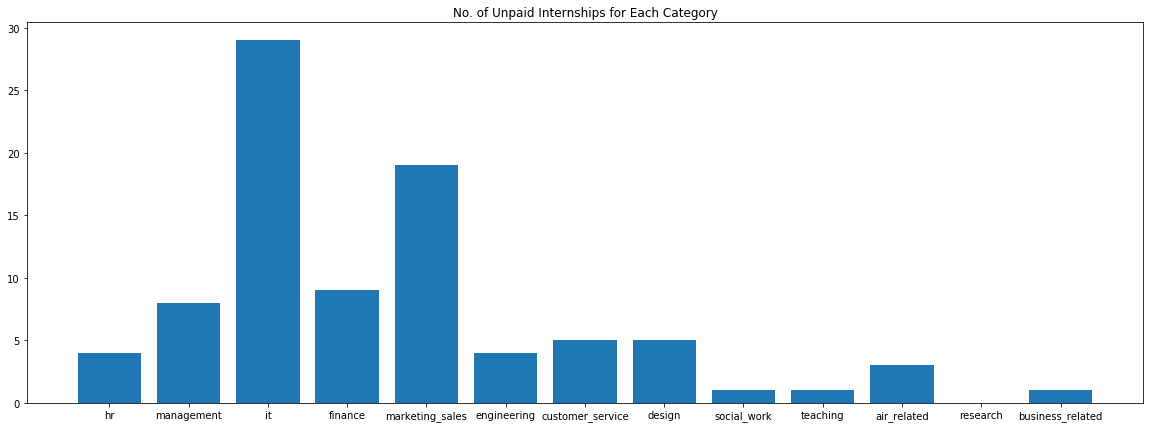

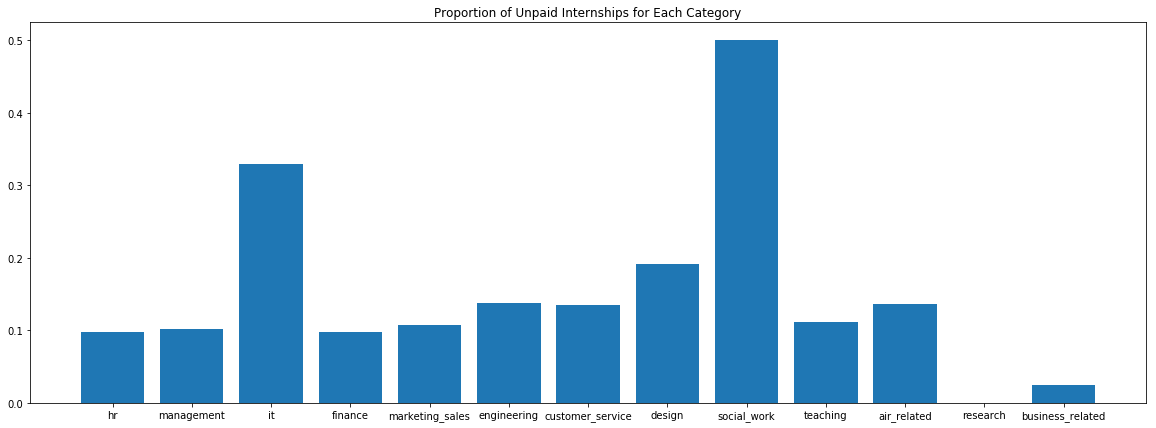

In [16]:
unpaid_list= []
perc_unpaid_list = []
for i in cats:
    # df for a particular category is returned
    df_temp = get_cat_items(i)
    n = df_temp.loc[df_temp.compensation =='unpaid'].shape[0]
    print(i)
    print(n)
    print('------')
    # for plotting
    unpaid_list.append(n)
    perc_unpaid_list.append(n/df_temp.shape[0])
    
plt.figure(figsize = (20,7))    
plt.bar(x = cats, height = unpaid_list)    
plt.title('No. of Unpaid Internships for Each Category')

plt.figure(figsize = (20,7))    
plt.bar(x = cats, height = perc_unpaid_list)    
plt.title('Proportion of Unpaid Internships for Each Category')

The above graphs show us two different ways of looking at the same question. If we go by pure no. of unpaid interships for each category, IT tops the list followed by marketing_sales and finance. But, this gives us a really biased view as when we look at the no. of unpaid internships divided by total internships in that category, it shows use that in fact social_work has the highest proportion followed by IT and then by Design. Marketing_sales and finance are far behind and other field have a higher proportion of unpaid internships.

Research is the only category that doesn't have any unpaid interships and thats either because of the bias in data as we only have 7 entries in the research category or probably because in research specialized knowledge is needed and to get those type of people, money has to be paid. Also govt instituitions and colleges often offer research internships and they grants which they can use to pay students as it is probably mandatory for them.